<a href="https://colab.research.google.com/github/TejasviniRHombal/Imaginative-Image-Generation/blob/main/Imaginative_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/TejasviniRHombal/Imaginative-Image-Generation.git
%cd Imaginative-Image-Generation
!ls -la

Cloning into 'Imaginative-Image-Generation'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 16.70 KiB | 2.39 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/Imaginative-Image-Generation
total 56
drwxr-xr-x 5 root root 4096 Nov 23 11:13 .
drwxr-xr-x 1 root root 4096 Nov 23 11:13 ..
-rw-r--r-- 1 root root 1482 Nov 23 11:13 app.py
drwxr-xr-x 2 root root 4096 Nov 23 11:13 examples
-rw-r--r-- 1 root root 1379 Nov 23 11:13 generate_image.py
drwxr-xr-x 8 root root 4096 Nov 23 11:13 .git
drwxr-xr-x 3 root root 4096 Nov 23 11:13 .github
-rw-r--r-- 1 root root 4688 Nov 23 11:13 .gitignore
-rw-r--r-- 1 root root  268 Nov 23 11:13 LICENSE
-rw-r--r-- 1 root root  232 Nov 23 11:13 prompts.md
-rw-r--r-- 1 root root   30 Nov 23 11:13 README.md
-rw-r--r-- 1 root root  131 Nov 23 11:13 requirements.tx

In [2]:
# Upgrade pip first
!pip install -q --upgrade pip

# Install diffusers stack + accelerate + safetensors + gradio etc.
!pip install -q diffusers transformers accelerate safetensors pillow tqdm
!pip install -q git+https://github.com/huggingface/accelerate.git@main
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating...


  0%|          | 0/20 [00:00<?, ?it/s]

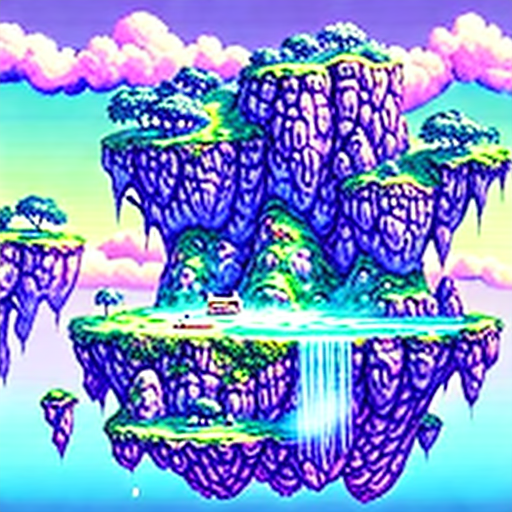

Saved as /content/colab_output.png


In [1]:
from diffusers import StableDiffusionPipeline
import torch
MODEL_ID = "stabilityai/sd-turbo"  # or runwayml/stable-diffusion-v1-5

# load to GPU in float16 for speed
pipe = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a dreamy floating island with pastel skies, highly detailed, concept art"
print("Generating...")
image = pipe(prompt, num_inference_steps=20, guidance_scale=7.5).images[0]
display(image)  # shows inline in Colab
image.save("colab_output.png")
print("Saved as /content/colab_output.png")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating...


  0%|          | 0/20 [00:00<?, ?it/s]

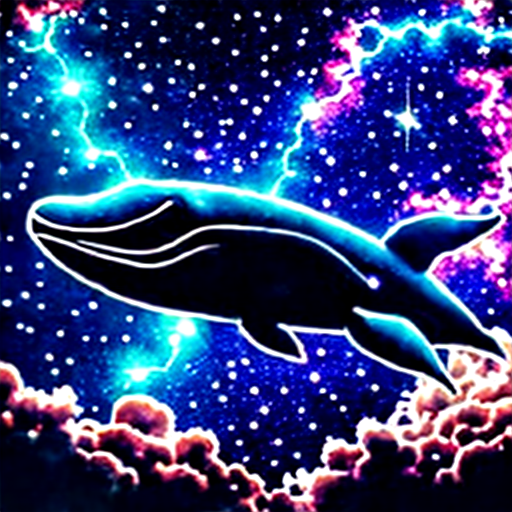

Saved as /content/colab_output.png


In [2]:
from diffusers import StableDiffusionPipeline
import torch
MODEL_ID = "stabilityai/sd-turbo"  # or runwayml/stable-diffusion-v1-5

# load to GPU in float16 for speed
pipe = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a giant cosmic whale swimming through the stars, vibrant nebula clouds, dreamy surreal style,majestic atmosphere"
print("Generating...")
image = pipe(prompt, num_inference_steps=20, guidance_scale=7.5).images[0]
display(image)  # shows inline in Colab
image.save("colab_output.png")
print("Saved as /content/colab_output.png")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating...


  0%|          | 0/20 [00:00<?, ?it/s]

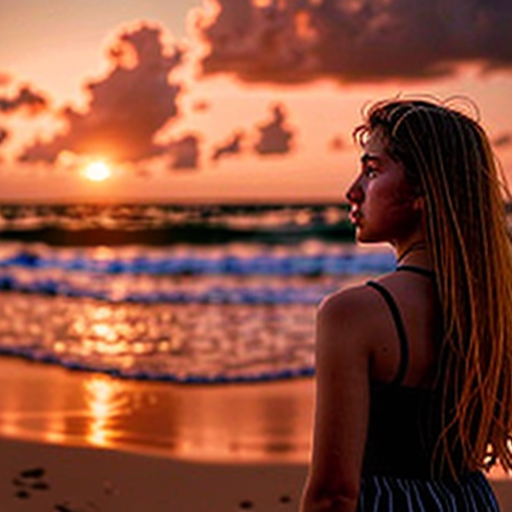

Saved as /content/colab_output.png


In [3]:
from diffusers import StableDiffusionPipeline
import torch
MODEL_ID = "stabilityai/sd-turbo"  # or runwayml/stable-diffusion-v1-5

# load to GPU in float16 for speed
pipe = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a hyper-realistic photo of a girl standing on a beach during golden hour sunset, warm natural lighting, shallow depth of field, 50mm lens, soft breeze, highly detailed skin texture, cinematic realism"
print("Generating...")
image = pipe(prompt, num_inference_steps=20, guidance_scale=7.5).images[0]
display(image)  # shows inline in Colab
image.save("colab_output.png")
print("Saved as /content/colab_output.png")